In [1]:
import tensorflow as tf
import numpy as np

BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

2023-03-08 16:10:51.340109: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# we need to specify the classes we would be looking for to 
# the imagedata generators
classes = [
    'Brown spot',
'Bacterial leaf blight',
'Leaf smut'
]

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/Users/msughter/Downloads/rice_leaf_diseases'
datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
    validation_split=0.2,
        horizontal_flip=True)

train_generator = datagen.flow_from_directory(
    data_dir,
    batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,) 

# validation data generator
validation_generator = datagen.flow_from_directory(
     data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE,
        #subset='training'
)

Found 120 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [4]:
# load the model for evaluation
model = tf.keras.models.load_model('/Users/msughter/Downloads/rice_model_1.h5')

2023-03-08 16:17:37.217475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.evaluate(validation_generator)

/Users/msughter/projects/denv/lib/python3.10/site-packages/keras/backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 8s 1s/step - loss: 0.9380 - accuracy: 0.5833


[0.9380128383636475, 0.5833333134651184]

In [7]:
def getData(generator, iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(generator):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        for img, label in zip(image_batch,label_batch):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels

In [8]:
# get images for testing
test_x, test_y = getData(validation_generator,5)

extracting features for batch.....1
extracting features for batch.....2
extracting features for batch.....3
extracting features for batch.....4
extracting features for batch.....5


In [9]:
# importing some evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [10]:
predictions = model.predict(np.array(test_x))

5/5 [==============================] - 5s 594ms/step


In [11]:
# reshape predictions and targets
new_predictions = np.argmax(predictions,axis=1)
new_test_y = np.argmax(test_y,axis=1)

new_test_y[10]

2

In [12]:
# get the labels to be used in the confusion
uniques_predictions = np.unique(new_predictions)
unique_test_y = np.unique(new_test_y)
labels=list(set(uniques_predictions).union(set(unique_test_y)))

In [13]:
cm = confusion_matrix(new_test_y,new_predictions,labels=labels)

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

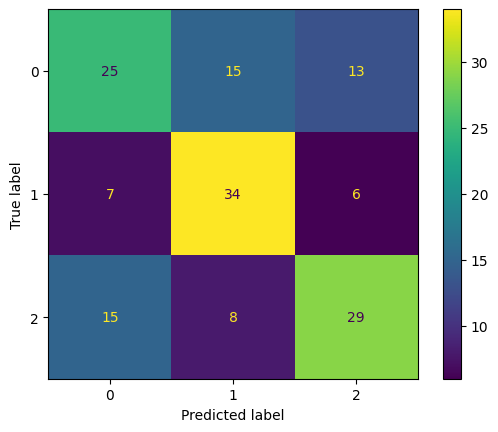

In [16]:
# plot the confusion matrix
disp.plot()

In [17]:
from sklearn.metrics import classification_report
report = classification_report(new_test_y,new_predictions,target_names=classes)
print(report)

                       precision    recall  f1-score   support

           Brown spot       0.53      0.47      0.50        53
Bacterial leaf blight       0.60      0.72      0.65        47
            Leaf smut       0.60      0.56      0.58        52

             accuracy                           0.58       152
            macro avg       0.58      0.58      0.58       152
         weighted avg       0.58      0.58      0.57       152



In [18]:
from keras.utils import plot_model

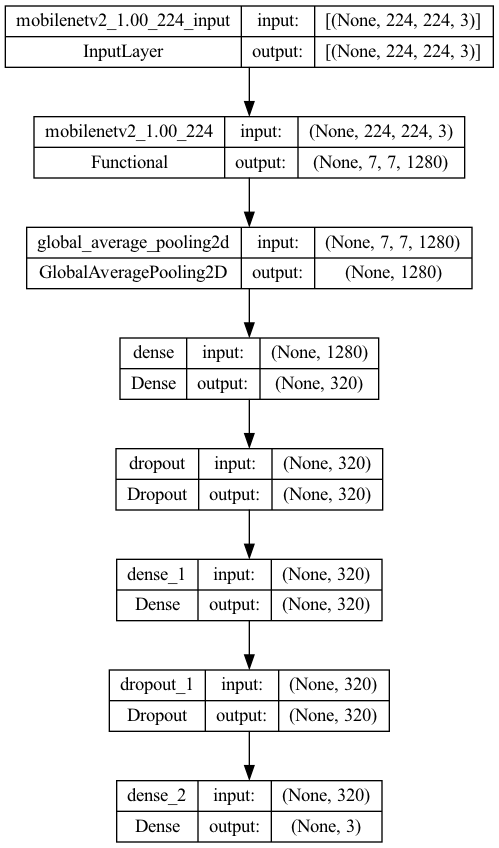

In [19]:
plot_model(model,to_file='rice_model.png',show_shapes=True)